In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

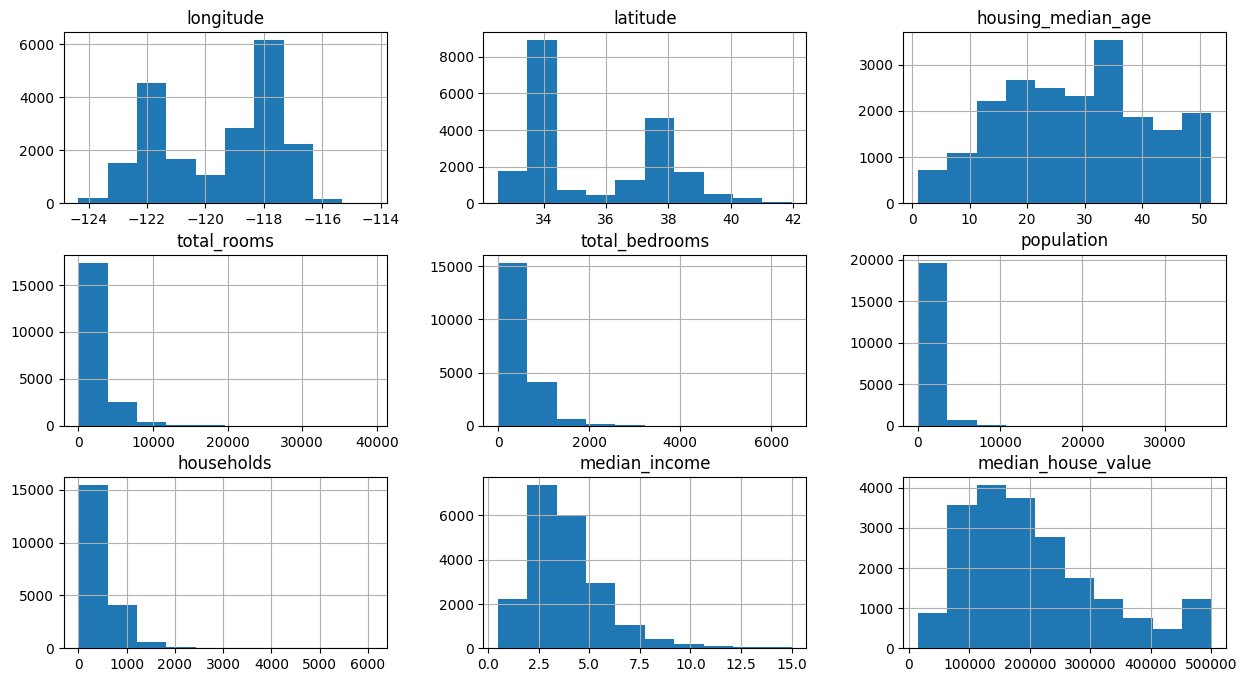

In [7]:
data.hist(figsize = (15,8))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

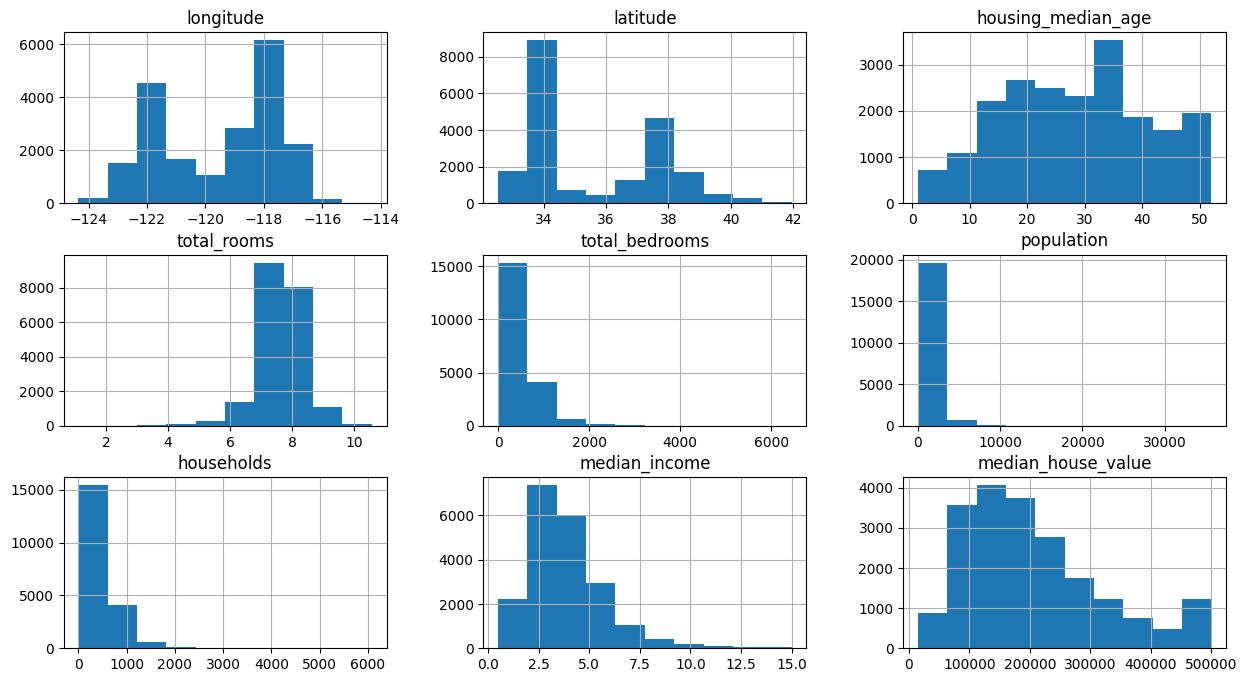

In [8]:
data['total_rooms'] = np.log(data['total_rooms']+1)
data.hist(figsize = (15,8))

In [9]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [10]:
data = data.join(pd.get_dummies(data.ocean_proximity,dtype = float)).drop(['ocean_proximity'],axis = 1)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,8.867850,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,7.291656,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,7.150701,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,7.395108,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,6.548219,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,7.720905,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,7.528869,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


<Axes: >

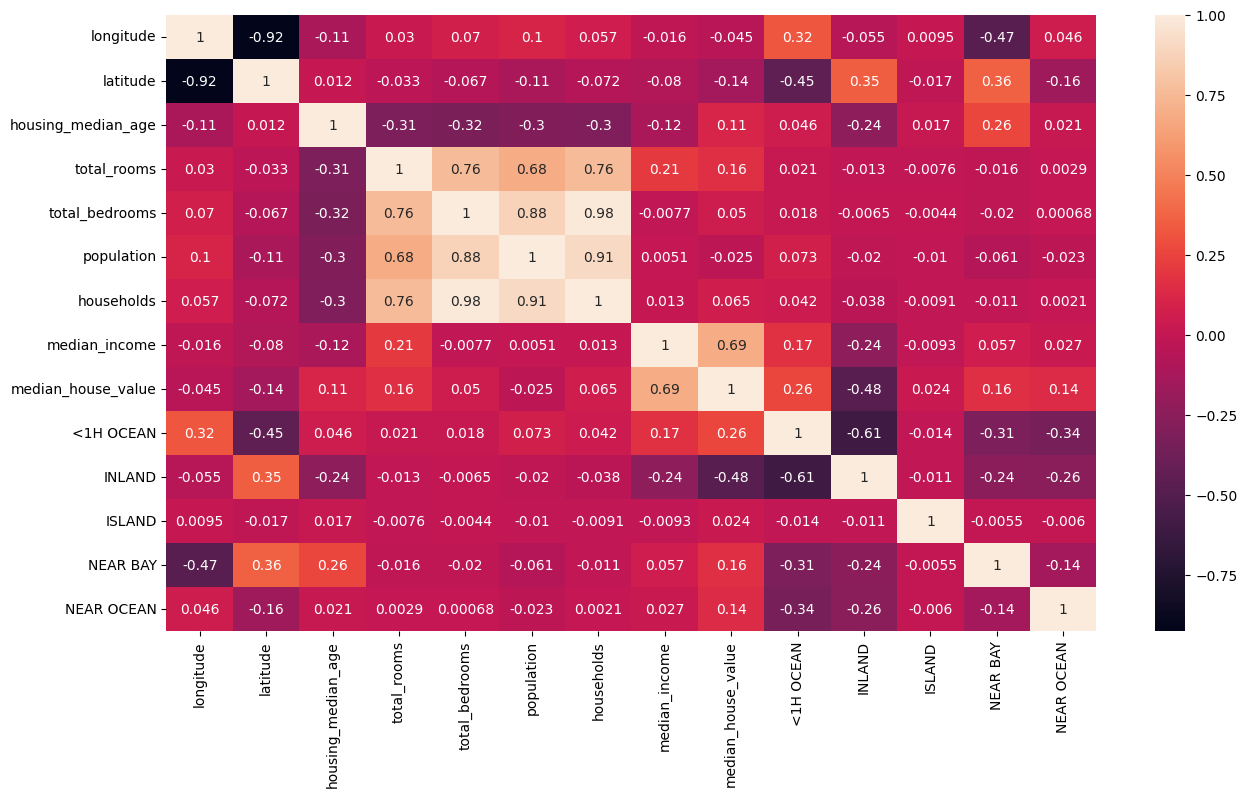

In [11]:
    plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)


In [12]:
data['bedrooms_ratio'] = data['total_bedrooms'] / data ['total_rooms']
data['household_rooms'] = data['total_rooms'] / data['households']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x= data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [15]:
test_data = X_test.join(Y_test)
train_data = X_train.join(Y_train)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression()

reg.fit(x,y)

r_square = reg.score(x,y)
r_square

0.6515728640831149

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)
reg.fit(X_train_s, Y_train)
r_square_s = reg.score(X_test_s, Y_test)
r_square_s



-7.330124964301573e+20

## Tugas
### Running ulang model ini tanpa ada variabel latitude dan longitude, kemudian pilih variabel variabel yang baik saja yang memiliki kemampuan untuk membuat r_squarenya meningkat. dasarnya diambil dari matrix kolerasi(heatmap)


## No 1 
### Tampilkan data yang kosong 

In [19]:
data1 = pd.read_csv('housing.csv')

result = data1[data1.isna().any(axis=1)]
result

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


## No 2 
### SKLearn


<Axes: >

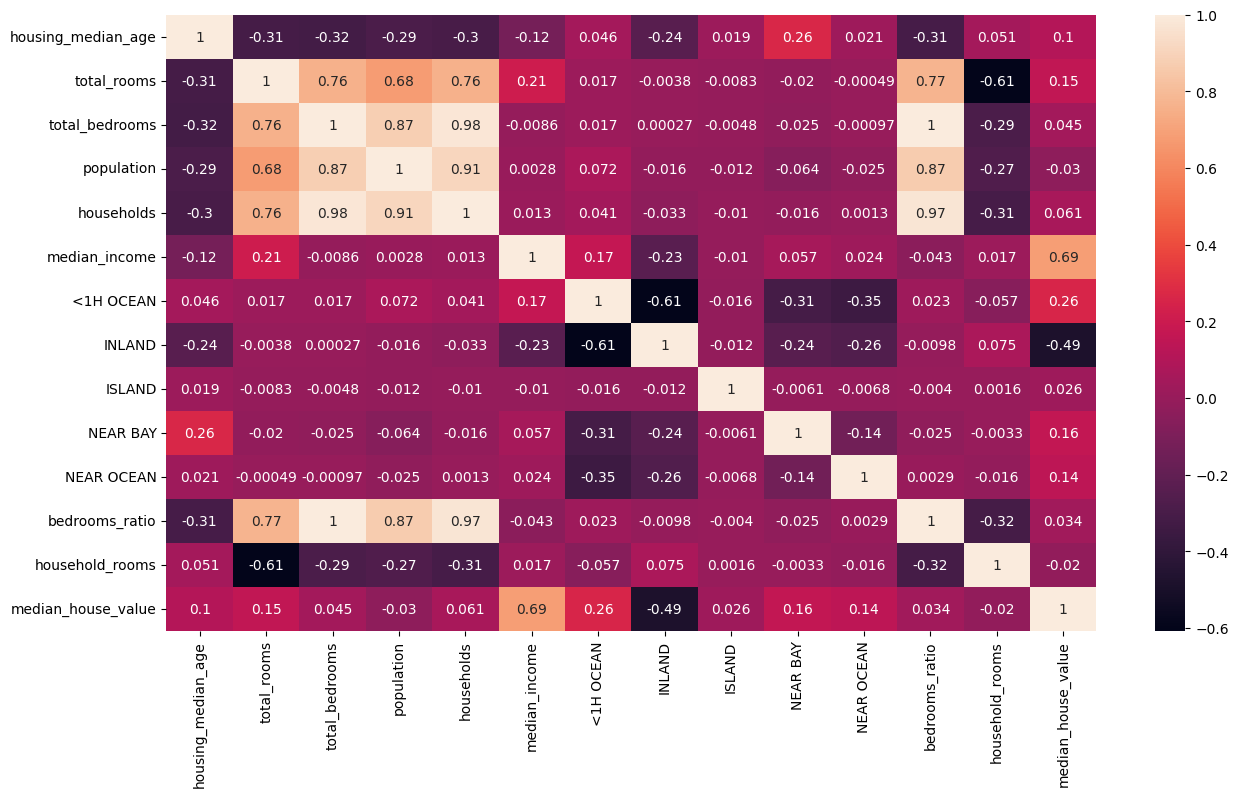

In [20]:
plt.figure(figsize=(15,8))
new_train = train_data.drop(['longitude','latitude'],axis = 1)
# new_train = train_data.drop(['latitude'], axis = 1)
# new_train = scaler.fit_transform(new_train)
new_train
sns.heatmap(new_train.corr(), annot=True)

In [21]:
data_new = new_train.loc[:, ['median_income', 'median_house_value','total_rooms','INLAND']]
data_new

,median_income,median_house_value,total_rooms,INLAND
7969,3.6987,152100.0,7.101676,0.0
5328,2.7679,277500.0,8.235361,0.0
3953,9.6465,500001.0,8.599694,0.0
9426,4.3125,261500.0,7.864420,0.0
16545,3.5595,161000.0,8.264621,1.0
...,...,...,...,...
4120,3.6058,257900.0,7.778211,0.0
11585,4.1548,216600.0,8.068403,0.0
4773,1.6581,118800.0,7.263330,0.0
10896,2.4539,115000.0,7.313220,0.0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x= data_new.drop(['median_house_value'],axis=1)
y = data_new['median_house_value']

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [24]:
test_data = X_test.join(Y_test)
train_data = X_train.join(Y_train)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
reg = LinearRegression()

reg.fit(x,y)

r_square = reg.score(x,y)
r_square

0.5832802602990379

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)
reg.fit(X_train_s, Y_train)
r_square_s = reg.score(X_test_s, Y_test)
r_square_s

0.574535474035119

In [31]:
reg. coef_

array([ 69166.65478191,   3398.20931099, -39613.42966191])

## No 3
### StatsModels


In [28]:
 import statsmodels.api as sm

In [38]:
# mod = sm.OLS(y, sm.add_constant(x))
mod = sm.OLS(y, x)
res = mod.fit()
print(res.summary()) 
res.rsquared

                                 OLS Regression Results                                
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                          4.938e+04
Date:                Tue, 24 Oct 2023   Prob (F-statistic):                        0.00
Time:                        16:09:36   Log-Likelihood:                     -2.0658e+05
No. Observations:               16346   AIC:                                  4.132e+05
Df Residuals:                   16343   BIC:                                  4.132e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

0.9006355924931807

In [30]:
sm.stats.linear_rainbow(res)

(1.006326263832186, 0.38781266571940387)

In [37]:
res.params

const            58955.407207
median_income    36330.903712
total_rooms       4529.944541
INLAND          -85609.193931
dtype: float64